In [8]:
import geopandas as gpd
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import shutil

In [14]:
# Fetch the ZIP file
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_JPN_shp.zip"
zip_path = "../data/raw/japan/gadm41_JPN_shp.zip"
extract_path = "../data/raw/japan/gadm41_JPN_shp"

# Downloading the file
print("Downloading shapefiles...")
response = requests.get(url)
with open(zip_path, "wb") as file:
    file.write(response.content)
print("Download complete!")

# Extract the ZIP file
print("Extracting files...")
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete!")

# Define paths for shapefiles
country_path = os.path.join(extract_path, "gadm41_JPN_0.shp")  # Country level
prefecture_path = os.path.join(extract_path, "gadm41_JPN_1.shp")  # Prefecture level
municipality_path = os.path.join(extract_path, "gadm41_JPN_2.shp")  # Municipality level

In [14]:
# Load shapefiles as GeoDataFrames
print("Loading shapefiles...")
country = gpd.read_file(country_path)
prefectures = gpd.read_file(prefecture_path)
municipalities = gpd.read_file(municipality_path)

In [66]:
# Function to clean column names
def clean_columns(gdf):
    gdf.columns = [col.split('_')[0].lower() for col in gdf.columns]
    return gdf

# Apply to the gdfs
municipalities = clean_columns(municipalities)
prefectures = clean_columns(prefectures)
country = clean_columns(country)

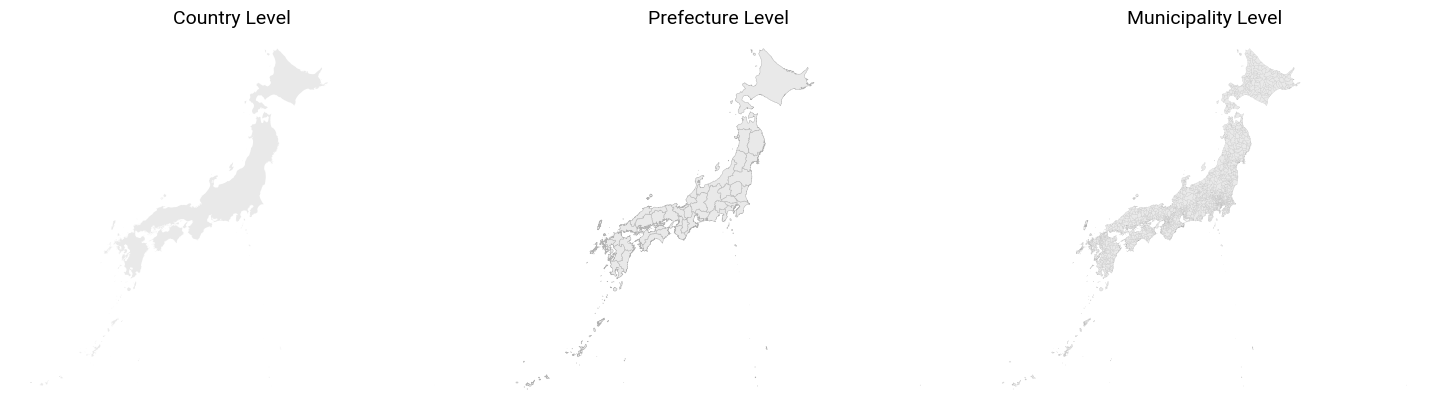

In [70]:
# Visualize the layers with improved readability
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Country Level
country.plot(ax=ax[0], color="#e9e9e9", edgecolor=None)
ax[0].set_title("Country Level", fontsize=14, fontfamily='Roboto')
ax[0].axis("off")  # Hide axes for better aesthetics

# Prefecture Level
prefectures.plot(ax=ax[1], color="#e9e9e9", edgecolor="#b1b1b1", linewidth=0.3)
ax[1].set_title("Prefecture Level", fontsize=14, fontfamily='Roboto')
ax[1].axis("off")

# Municipality Level
municipalities.plot(ax=ax[2], color="#e9e9e9", edgecolor="#b1b1b1", linewidth=0.1)
ax[2].set_title("Municipality Level", fontsize=14, fontfamily='Roboto')
ax[2].axis("off")

# Adjust layout for better spacing
plt.tight_layout(pad=3)
plt.show()

---

In [24]:
# Delete downloaded and extracted files
os.remove(zip_path)
shutil.rmtree(extract_path)